# Python For Data Analysis Chapter 2

Taking in data: json, collection, pandas

In [1]:
path = '/Users/jordangiebas/MSCF/SideProjects/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [2]:
open(path).readline() # Note if you wanted all the lines, use method: .readlines()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json

In [4]:
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
records[0]['tz']

'America/New_York'

## Getting counts standard way, count collection, pandas

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Clearly there are some empty data, we'll leave them in and produce counts for the time_zones in multiple ways

## Definition of get_counts: (Non-pythonic Way)

In [9]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
    

## Defintion of get_counts2: Using Collections

In [10]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values initialize to zero
    for x in sequence: 
        counts[x] += 1
    return counts    

In [11]:
cnts = get_counts(time_zones)

In [12]:
cnts['America/New_York']

1251

In [13]:
len(time_zones)

3440

## Top Counts in different ways

In [14]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [15]:
top_counts(cnts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [16]:
from collections import Counter

In [17]:
counts = Counter(time_zones)

In [18]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Now let's do it with Pandas

In [19]:
from pandas import DataFrame, Series
import pandas as pd

In [20]:
df = DataFrame(records)

In [21]:
tz_cnts = df['tz'].value_counts()

In [22]:
tz_cnts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [23]:
clean_tz = df['tz'].fillna('Missing')

In [24]:
clean_tz[clean_tz == ''] = 'Unknown'

In [25]:
tz_counts = clean_tz.value_counts()

In [26]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [27]:
tz_counts[:10].plot(kind='barh',rot=0)

## Analyzing the JSON, ReGeX, and user behavior

In [28]:
results = Series([x.split()[0] for x in df.a.dropna()])

In [29]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [30]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

### Testing for Windows or not Users

In [31]:
cframe = df[df.a.notnull()]

In [32]:
import numpy as np

In [33]:
ops = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [34]:
ops[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [35]:
by_tz_os = cframe.groupby(['tz', ops])

In [36]:
by_tz_os

In [37]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [220]:
agg_counts.head()

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [39]:
indexer = agg_counts.sum(1).argsort()

In [40]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [41]:
count_subset = agg_counts.take(indexer)[-10:]

In [42]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


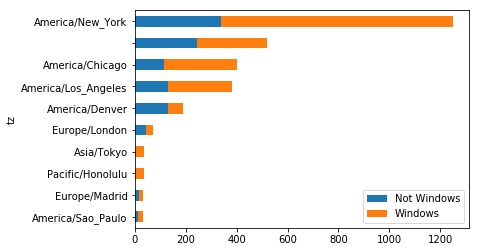

In [43]:
count_subset.plot(kind='barh', stacked=True)

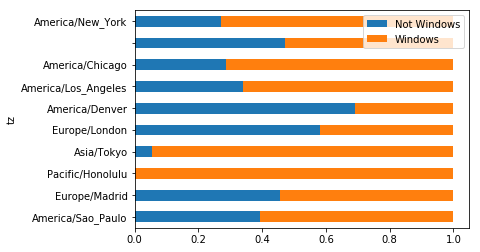

In [44]:
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh', stacked=True)

In [45]:
type(count_subset)

pandas.core.frame.DataFrame

# Movie Data Analysis

In [46]:
path2 = '~/MSCF/SideProjects/pydata-book/ch02/movielens'

In [47]:
import pandas as pd

In [48]:
user_path = str(path2 + "users.dat")

In [49]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('~/MSCF/SideProjects/pydata-book/ch02/movielens/users.dat', 
                      sep='::', header=None, names=unames, engine='python')

In [51]:
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [53]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('~/MSCF/SideProjects/pydata-book/ch02/movielens/ratings.dat', 
                      sep='::', header=None, names=rnames, engine='python')

In [54]:
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [55]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('~/MSCF/SideProjects/pydata-book/ch02/movielens/movies.dat', 
                       sep='::', header=None, names=mnames, engine='python')

In [56]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Merging the data in each of the frames

In [57]:
data = pd.merge(pd.merge(ratings,users),movies)

In [58]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### Mean Ratings based on Gender

In [66]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [67]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### Filter by films with at least 250 ratings

In [68]:
ratings_by_title = data.groupby('title').size()

In [69]:
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [74]:
title_universe = ratings_by_title.index[ratings_by_title >= 250]

In [75]:
len(ratings_by_title)

3706

In [76]:
len(title_universe)

1216

In [79]:
mean_ratings = mean_ratings.loc[title_universe]

In [80]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [81]:
ratings_by_title['$1,000,000 Duck (1971)']

37

In [83]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [85]:
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [86]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [88]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [89]:
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [90]:
# Standard Deviation of rating grouped by title
rating_std = data.groupby('title')['rating'].std()

In [91]:
rating_std.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [93]:
# Now filtered by active titles
active_std = rating_std.loc[title_universe]

In [94]:
active_std.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [100]:
# Now put in ascending order
active_std.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [106]:
names_1880 = pd.read_csv("/Users/jordangiebas/MSCF/SideProjects/pydata-book/ch02/names/yob1880.txt",
                names = ['name','sex','births'])

In [107]:
names_1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [109]:
# Group by sex and sum them all up to get the total number M/F of births that year
names_1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [110]:
# Let's do this for all years in the text file 
years = range(1880,2011)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = '~/MSCF/SideProjects/pydata-book/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# Concatentate everything together
names = pd.concat(pieces, ignore_index=True)


In [111]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [114]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [120]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


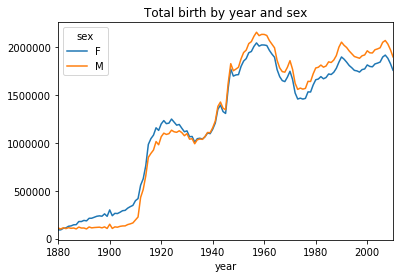

In [121]:
total_births.plot(title='Total birth by year and sex')

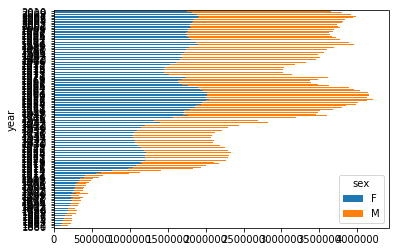

In [123]:
total_births.plot(kind='barh', stacked=True)

### Relative proportion of childrens name out of total

In [127]:
# Definition of proprotion column
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = (births / births.sum()) * 100
    return group

names = names.groupby(['year','sex']).apply(add_prop)

In [129]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.764334
1,Anna,F,2604,1880,2.861759
2,Emma,F,2003,1880,2.201268
3,Elizabeth,F,1939,1880,2.130933
4,Minnie,F,1746,1880,1.918829


In [131]:
# Sanity check, the total proportion should sum to 100%
np.allclose(names.groupby(['year','sex']).prop.sum(), 100)

True

In [133]:
# Now we obtain the top 1000 names filtered on year and sex
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [135]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  7.764334
         1       Anna   F    2604  1880  2.861759
         2       Emma   F    2003  1880  2.201268
         3  Elizabeth   F    1939  1880  2.130933
         4     Minnie   F    1746  1880  1.918829

In [136]:
boys  = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [142]:
del top1000['year']

In [144]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [146]:
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [147]:
subset = total_births[['John','Harry','Mary','Marilyn']]

In [149]:
subset.head()

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x121c276d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d9027f0>], dtype=object)

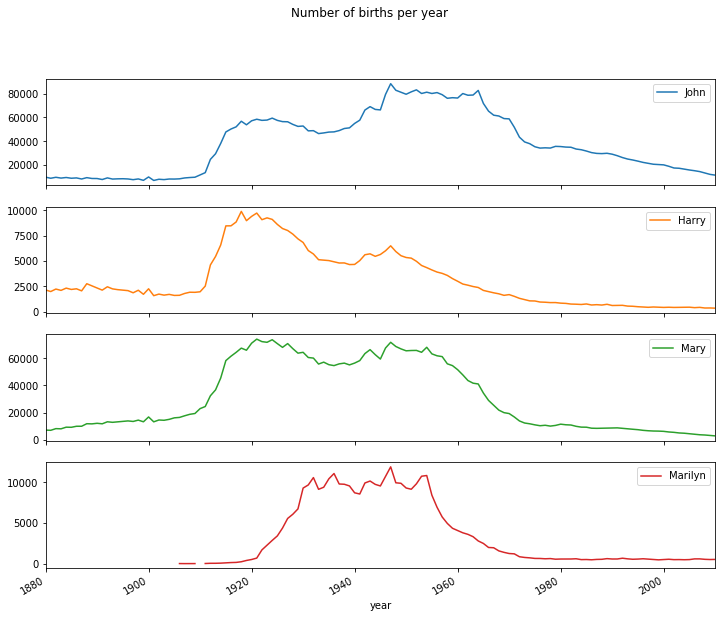

In [154]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

/usr/local/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [161]:
del top1000['sex']

In [162]:
table = top1000.pivot_table(values='prop',index='year',columns='sex',aggfunc=sum)

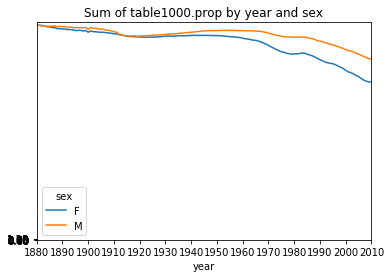

In [165]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0.6,1.2,13), xticks=range(1880,2020,10))

In [166]:
df = boys[boys.year == 2010]

In [168]:
df.head()

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  1.152297
         1676645    Ethan   M   17866  2010  0.941117
         1676646  Michael   M   17133  2010  0.902505
         1676647   Jayden   M   17030  2010  0.897080
         1676648  William   M   16870  2010  0.888651

In [174]:
prop_cumsum = df.sort_values(by='prop', ascending=True).prop.cumsum()

In [175]:
prop_cumsum[:10]

year  sex         
2010  M    1677645    0.010167
           1677638    0.020386
           1677639    0.030605
           1677642    0.040824
           1677641    0.051043
           1677640    0.061263
           1677637    0.071535
           1677635    0.081807
           1677636    0.092078
           1677634    0.102403
Name: prop, dtype: float64

In [176]:
prop_cumsum.searchsorted(0.5)

array([47])

### Last Letter Extract

In [177]:
# extract last letter from name
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index = last_letters, columns = ['sex','year'], aggfunc=sum)

In [178]:
subtable = table.reindex(columns=[1910,1960,2010], level='year')

In [179]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [181]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [182]:
letter_prop = subtable / subtable.sum().astype(float)

In [184]:
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

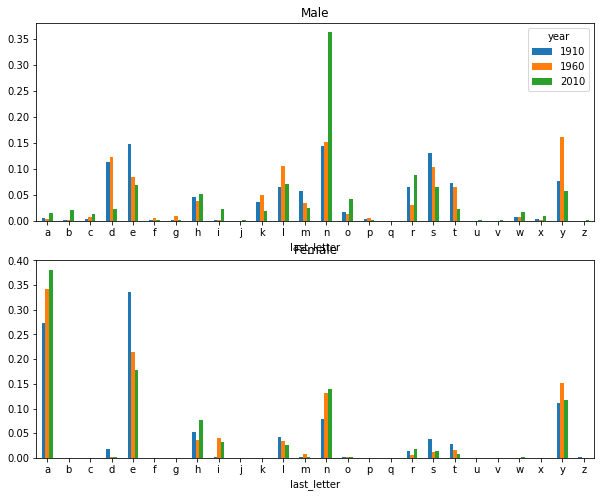

In [187]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female', legend=False)

In [188]:
letter_prop = table / table.sum().astype(float)

In [191]:
dny_ts = letter_prop.loc[['d','n','y'],'M'].T

In [192]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


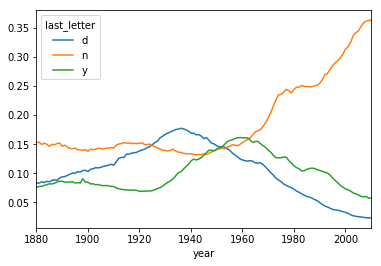

In [194]:
dny_ts.plot()

In [195]:
all_names = top1000.name.unique()

In [198]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [199]:
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [200]:
lesley_like = all_names[mask]

In [201]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [202]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [205]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [209]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [211]:
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [212]:
table = table.div(table.sum(1),axis=0)

In [213]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [218]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


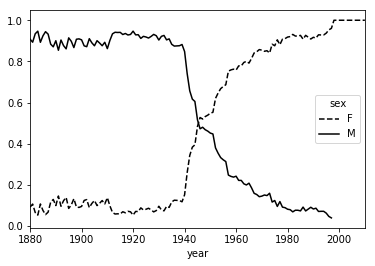

In [219]:
table.plot(style={'M': 'k-', 'F': 'k--'})